In [96]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from kneed import KneeLocator



In [97]:
# Load dataset
data = pd.read_csv("../Data/student-mat.csv",delimiter=';')

In [98]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Preprocessing 

In [99]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [100]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[['G1', 'G2', 'G3']])

In [101]:
label_encoder = LabelEncoder()
data['studytime'] = label_encoder.fit_transform(data['studytime'])
data['absences'] = label_encoder.fit_transform(data['absences'])
data['health'] = label_encoder.fit_transform(data['health'])

# Modeling

KMeans

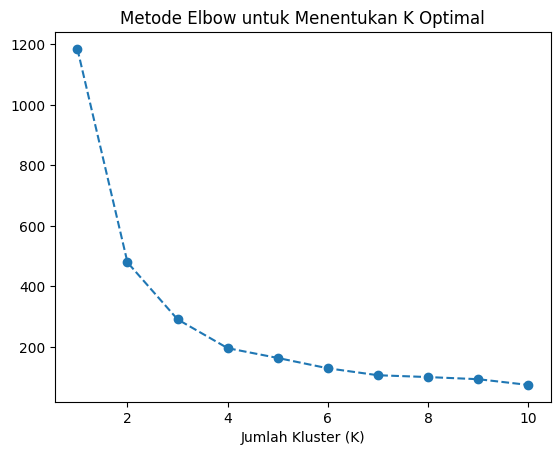

K optimal berdasarkan metode Elbow adalah: 3


In [102]:
# Menyiapkan array untuk inersia
inersia = []

# Menghitung inersia untuk berbagai nilai K
for i in range(1, 11):  # Mencoba K dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)  # Menggunakan data yang telah distandarisasi
    inersia.append(kmeans.inertia_)

# Membuat plot Elbow

plt.plot(range(1, 11), inersia, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Kluster (K)')
plt.show()

kn=KneeLocator(range(1,11),inersia,curve='convex',direction='decreasing')
print(f"K optimal berdasarkan metode Elbow adalah: {kn.elbow}")

Performence KMeans

In [103]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    print("Untuk cluster: {}, dengan Silhouette Score is: {}".format(i,score))

Untuk cluster: 2, dengan Silhouette Score is: 0.4960708182471214
Untuk cluster: 3, dengan Silhouette Score is: 0.4626597542765649
Untuk cluster: 4, dengan Silhouette Score is: 0.43212371800072696
Untuk cluster: 5, dengan Silhouette Score is: 0.4243370558493075
Untuk cluster: 6, dengan Silhouette Score is: 0.39061555180509794
Untuk cluster: 7, dengan Silhouette Score is: 0.3833388653835752
Untuk cluster: 8, dengan Silhouette Score is: 0.3665282412160297
Untuk cluster: 9, dengan Silhouette Score is: 0.3591228565267588


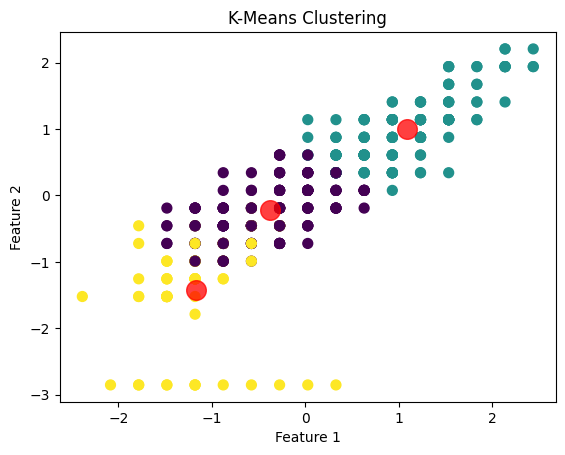

In [104]:
# Melakukan klastering dengan K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)

# Memvisualisasikan klaster
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Memvisualisasikan pusat-pusat klaster
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Agglomerative Clustering

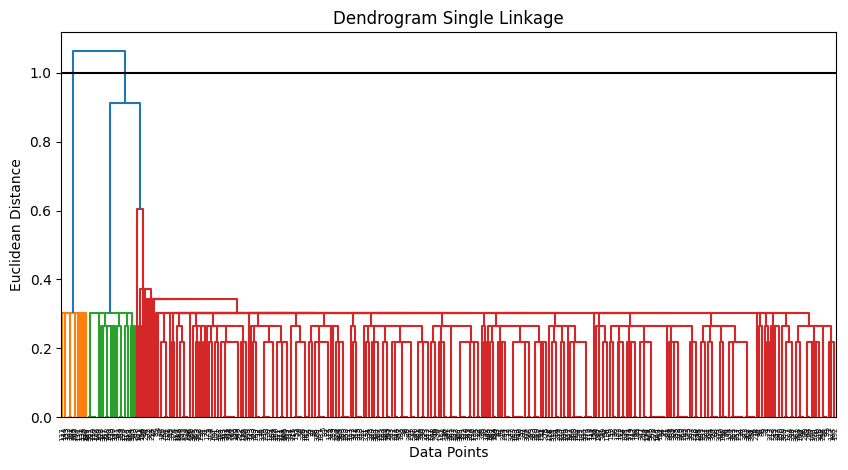

Nilai k optimal untuk metode Single linkage adalah: 2 


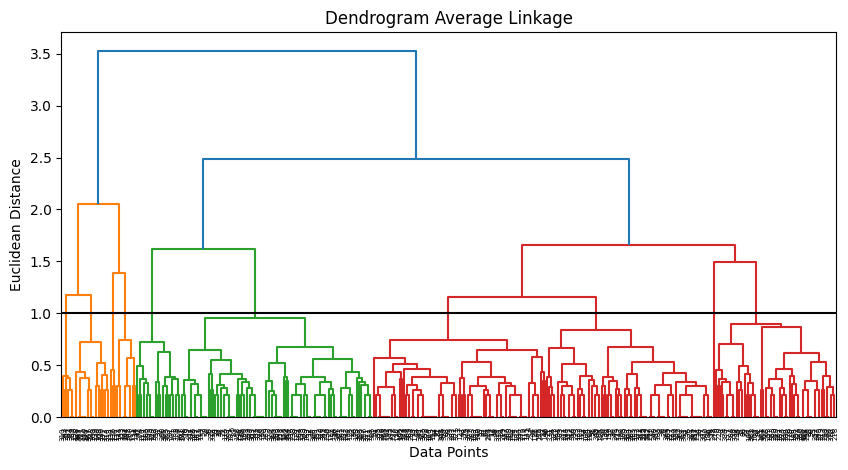

Nilai k optimal untuk metode Average linkage adalah: 2 


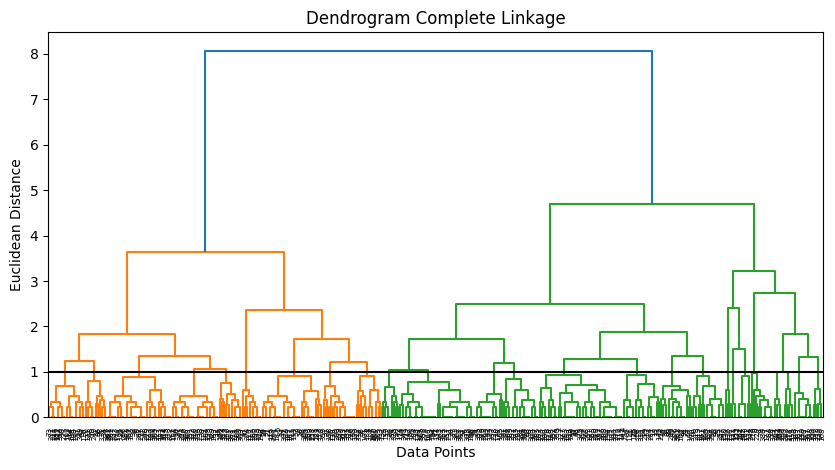

Nilai k optimal untuk metode Complete linkage adalah: 2 


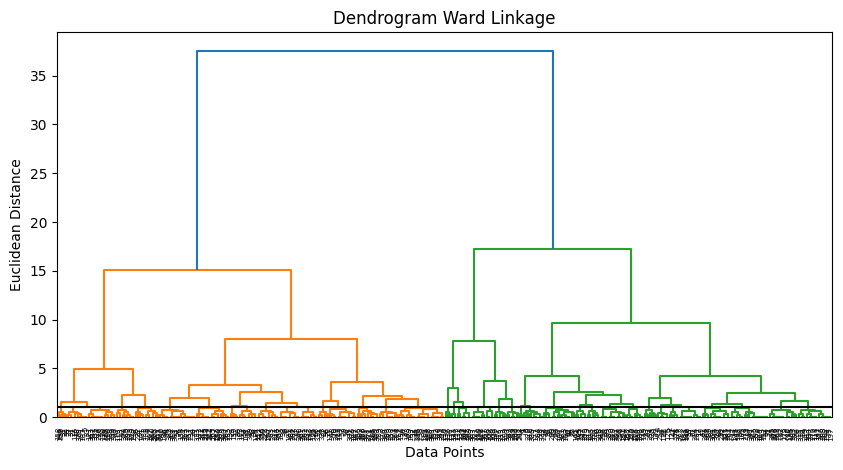

Nilai k optimal untuk metode Ward linkage adalah: 2 


Parameter terbaik: {'linkage': 'ward', 'n_clusters': 2}


In [105]:
# Daftar metode linkage yang ingin diuji
linkage_methods = ['single', 'average', 'complete', 'ward']

# Inisialisasi list untuk menyimpan nilai Silhouette Score terbaik dan parameter terbaik
best_silhouette_score = -1
best_params = {}

# Loop melalui setiap metode linkage
for method in linkage_methods:
    # Menghitung dendrogram
    linkage_data = linkage(df_scaled, method=method, metric='euclidean')
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_data)
    plt.title(f"Dendrogram {method.capitalize()} Linkage")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    max_d = 1  # Batas threshold
    plt.axhline(y=max_d, c='k')  # Menambahkan garis horizontal untuk batas threshold
    plt.show()
    
    # Inisialisasi list untuk menyimpan nilai Silhouette Score
    silhouette_scores = []
    k_range = range(2, 11)

    # Loop melalui setiap nilai k
    for k in k_range:
        # Melakukan klasterisasi dengan Agglomerative Clustering
        clusterer = AgglomerativeClustering(n_clusters=k, linkage=method)
        cluster_labels = clusterer.fit_predict(df_scaled)
        
        # Menghitung Silhouette Score
        avg_silhouette_score = silhouette_score(df_scaled, cluster_labels)
        
        # Menambahkan nilai Silhouette Score ke dalam list
        silhouette_scores.append(avg_silhouette_score)
    
    # Mencari nilai k dengan Silhouette Score tertinggi
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Nilai k optimal untuk metode {method.capitalize()} linkage adalah: {optimal_k} ")
    
    # Memeriksa apakah nilai Silhouette Score terbaik
    if max(silhouette_scores) > best_silhouette_score:
        best_silhouette_score = max(silhouette_scores)
        best_params['linkage'] = method
        best_params['n_clusters'] = optimal_k

print("")
print("")
print("Parameter terbaik:", best_params)

Performence Agglomerative

In [106]:
# Menyiapkan array untuk menyimpan nilai Silhouette Score
silhouette_scores_agg = []

for method in linkage_methods:
    print(f"\nAgglomerative Clustering dengan metode penggabungan: {method}")
    silhouette_scores = []
    
    for i in range(2, 10):
        agg_clustering = AgglomerativeClustering(n_clusters=i, linkage=method)
        agg_labels = agg_clustering.fit_predict(df_scaled)
        silhouette_avg = silhouette_score(df_scaled, agg_labels)
        silhouette_scores.append(silhouette_avg)
        print("Untuk cluster: {}, dengan silhouette score adalah: {}".format(i, silhouette_avg))
    
    silhouette_scores_agg.append(silhouette_scores)


Agglomerative Clustering dengan metode penggabungan: single
Untuk cluster: 2, dengan silhouette score adalah: 0.4843159926829116
Untuk cluster: 3, dengan silhouette score adalah: 0.4089880270864929


Untuk cluster: 4, dengan silhouette score adalah: 0.3832795401721615
Untuk cluster: 5, dengan silhouette score adalah: 0.20917667076730617
Untuk cluster: 6, dengan silhouette score adalah: -0.1548073450662406
Untuk cluster: 7, dengan silhouette score adalah: -0.19692755545851012
Untuk cluster: 8, dengan silhouette score adalah: -0.3246419073858792
Untuk cluster: 9, dengan silhouette score adalah: -0.35022783829980403

Agglomerative Clustering dengan metode penggabungan: average
Untuk cluster: 2, dengan silhouette score adalah: 0.46847770860991816
Untuk cluster: 3, dengan silhouette score adalah: 0.4462563517158772
Untuk cluster: 4, dengan silhouette score adalah: 0.43026450704265334
Untuk cluster: 5, dengan silhouette score adalah: 0.411278663532157
Untuk cluster: 6, dengan silhouette score adalah: 0.37956062609680824
Untuk cluster: 7, dengan silhouette score adalah: 0.35940973984196156
Untuk cluster: 8, dengan silhouette score adalah: 0.3594218649164093
Untuk cluster: 9, dengan silhou

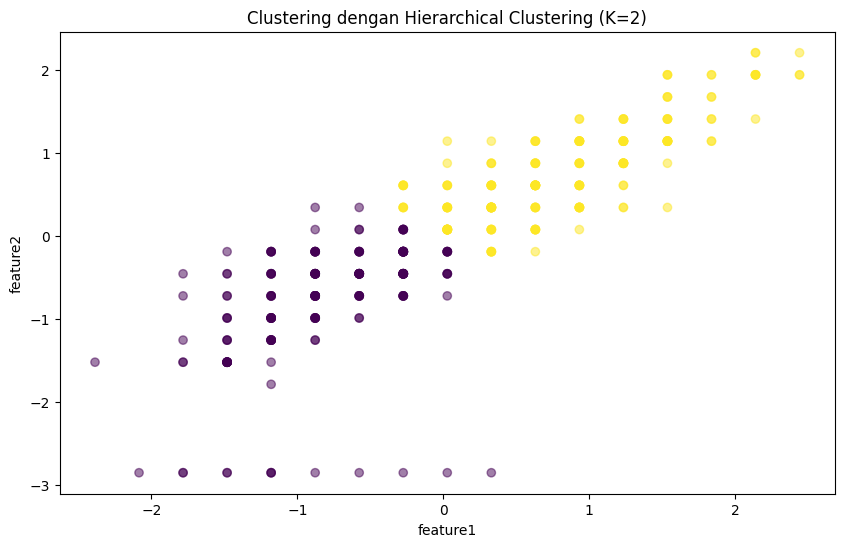

In [133]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_clustering.fit(df_scaled)
# Membuat scatter plot untuk Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agg_clustering.labels_, cmap='viridis', alpha=0.5)
plt.title('Clustering dengan Hierarchical Clustering (K=2)')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

DBSCAN and Performence

In [114]:
dbscan1 = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels1 = dbscan1.fit_predict(df_scaled)
silhouette_score_dbscan1 = silhouette_score(df_scaled, dbscan_labels1)
n_clusters_dbscan1 = len(set(dbscan_labels1)) - (1 if -1 in dbscan_labels1 else 0)
n_noise1_ = list(dbscan_labels1).count(-1)
print("Silhouette Score for DBSCAN:", silhouette_score_dbscan1)
print("Number of clusters:", n_clusters_dbscan1)
print("Estimated number of noise points: %d" % n_noise1_)

Silhouette Score for DBSCAN: 0.4061792138144153
Number of clusters: 3
Estimated number of noise points: 4


In [118]:
dbscan2 = DBSCAN(eps=1.0, min_samples=10)
dbscan_labels2 = dbscan2.fit_predict(df_scaled)
silhouette_score_dbscan2 = silhouette_score(df_scaled, dbscan_labels2)
n_clusters_dbscan2 = len(set(dbscan_labels2)) - (1 if -1 in dbscan_labels2 else 0)
n_noise2_ = list(dbscan_labels2).count(-1)
print("Silhouette Score for DBSCAN:", silhouette_score_dbscan2)
print("Number of clusters:", n_clusters_dbscan2)
print("Estimated number of noise points: %d" % n_noise2_)

Silhouette Score for DBSCAN: 0.4843159926829116
Number of clusters: 2
Estimated number of noise points: 0


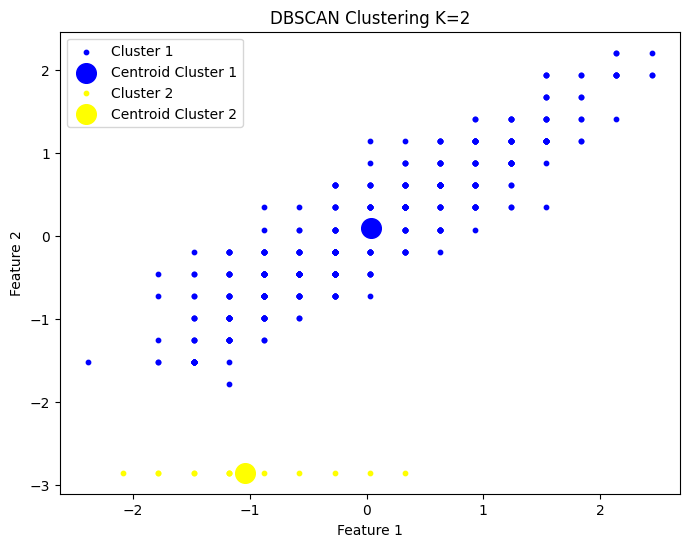

In [137]:
# Mengekstrak label cluster untuk setiap titik data
cluster_labels = dbscan_labels2

# Menghitung jumlah cluster yang terbentuk
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Menentukan warna untuk setiap cluster
cluster_colors = ['blue', 'yellow', 'red']

# Membuat plot dengan label cluster yang jelas
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    # Mencari titik-titik data yang termasuk dalam cluster saat ini
    cluster_points = df_scaled[cluster_labels == cluster_id]
    
    # Menggambar titik-titik data dengan warna yang sesuai
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, c=cluster_colors[cluster_id], label=f"Cluster {cluster_id+1}")
    
    # Menampilkan centroid cluster (jika ada)
    if cluster_id != -1:  # Jangan tampilkan centroid untuk noise
        cluster_center = np.mean(cluster_points, axis=0)
        plt.scatter(cluster_center[0], cluster_center[1], s=200, c=cluster_colors[cluster_id], marker='o', label=f"Centroid Cluster {cluster_id+1}")

# Menambahkan label dan legenda
plt.title('DBSCAN Clustering K=2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()